# Explore the LS DR10 cross-matches for potential SN IIP

Author: Melissa Graham, Midori Rollins

## Set up and read files

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

In [2]:
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']

all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','^']
all_fsizes  = [5, 5, 7]

Read in the nightly epoch light curves for all candidates.

In [3]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'

candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))

del fnm

Read in the parameters for the nightly epoch light curves for all candidates.

In [4]:
fnm = '../all_nightly_epochs_files/candidate_lightcurve_parameters.dat'

paramLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
paramLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
paramLC_tspan = np.loadtxt( fnm, dtype='float', usecols=(2) )
paramLC_tspan_g = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag = np.loadtxt( fnm, dtype='float', usecols=(6) )
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp = np.loadtxt( fnm, dtype='float', usecols=(10) )
paramLC_amp_g = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps = np.loadtxt( fnm, dtype='int', usecols=(14) )
paramLC_neps_g = np.loadtxt( fnm, dtype='int', usecols=(15) )
paramLC_neps_r = np.loadtxt( fnm, dtype='int', usecols=(16) )
paramLC_neps_i = np.loadtxt( fnm, dtype='int', usecols=(17) )

del fnm

Read in the list of candidate IDs for potential SNIIP.

In [5]:
potsniip_candid = np.loadtxt('potential_sniip_list.dat', dtype='str', usecols=(0))

Read in all rows of the cross-matched file.

`flagstar` : 1 if matched to a star; 0 if matched to a galaxy; -1 if unmatched (int) 

`flagcore` : 1 if matched to the core of the galaxy; 0 otherwise (int) 

`flagmatch` : 1 if a star AND galaxy met constraints; 0 if one or the other; -1 if unmatched (int) 


In [6]:
fnm = '../cross_matched_LSDR10/candidate_xmatch_LSdr10.dat'
lsdr10xm_candid   = np.loadtxt(fnm, dtype='str', usecols=(0))
lsdr10xm_candra   = np.loadtxt(fnm, dtype='float', usecols=(1))
lsdr10xm_canddec  = np.loadtxt(fnm, dtype='float', usecols=(2))
lsdr10xm_flagstar = np.loadtxt(fnm, dtype='int', usecols=(4))
lsdr10xm_flagcore = np.loadtxt(fnm, dtype='int', usecols=(5))
lsdr10xm_flagmatch= np.loadtxt(fnm, dtype='int', usecols=(6))
lsdr10xm_sep      = np.loadtxt(fnm, dtype='float', usecols=(7))
lsdr10xm_ra       = np.loadtxt(fnm, dtype='float', usecols=(8))
lsdr10xm_dec      = np.loadtxt(fnm, dtype='float', usecols=(9))
lsdr10xm_rmag     = np.loadtxt(fnm, dtype='float', usecols=(13))
lsdr10xm_type     = np.loadtxt(fnm, dtype='str', usecols=(15))
lsdr10xm_shaper   = np.loadtxt(fnm, dtype='float', usecols=(19))
lsdr10xm_rpsfsize = np.loadtxt(fnm, dtype='float', usecols=(21))  
lsdr10xm_meanpz   = np.loadtxt(fnm, dtype='float', usecols=(23))
lsdr10xm_stdpz    = np.loadtxt(fnm, dtype='float', usecols=(24))
lsdr10xm_specz    = np.loadtxt(fnm, dtype='float', usecols=(25))
del fnm

For every potential sniip store its index in the `paramLC_` arrays 
as `mindex` for the `lsdr10xm_` arrays.

In [7]:
lsdr10xm_mindex = np.zeros(len(lsdr10xm_candid), dtype='int')-1

if potsniip_candid.size > 1:
    for cid in potsniip_candid:
        tx = np.where(lsdr10xm_candid == cid)[0]
        if len(tx) == 1:
            ttx = np.where(paramLC_candid == cid)[0]
            if len(ttx) == 1:
                lsdr10xm_mindex[tx[0]] = ttx[0]
            del ttx
        del tx
if potsniip_candid.size == 1:
    tx = np.where(lsdr10xm_candid == potsniip_candid)[0]
    if len(tx) == 1:
        ttx = np.where(paramLC_candid == potsniip_candid)[0]
        if len(ttx) == 1:
            lsdr10xm_mindex[tx[0]] = ttx[0]
        del ttx
    del tx

Check that all the potential SNIa were successfully matched.

In [8]:
tx = np.where(lsdr10xm_mindex >= 0)[0]
print(len(tx), ' should equal ', potsniip_candid.size)

7  should equal  7


Read in the file with links and review the static-sky stamps for the targets of interest.

In [9]:
fnm = '../cross_matched_LSDR10/candidate_links.dat'
link_candid = np.loadtxt(fnm, dtype='str', usecols=(0))
link_lsview = np.loadtxt(fnm, dtype='str', usecols=(1))
link_rkview = np.loadtxt(fnm, dtype='str', usecols=(2))
for temp in potsniip_candid:
    tx = np.where(link_candid == temp)[0]
    print(temp, link_lsview[tx[0]])
    del tx
del fnm

DC21daldo https://www.legacysurvey.org/viewer/cutout.jpg?ra=8.9677212659167&dec=-43.846501378026&layer=ls-dr9&pixscale=0.06
DC21jay https://www.legacysurvey.org/viewer/cutout.jpg?ra=150.564027874473&dec=3.21026683645687&layer=ls-dr9&pixscale=0.06
DC22hxfqh https://www.legacysurvey.org/viewer/cutout.jpg?ra=8.43093263763677&dec=-43.7762941548716&layer=ls-dr9&pixscale=0.06
DC22iykhs https://www.legacysurvey.org/viewer/cutout.jpg?ra=7.22327103275092&dec=-43.3976670920438&layer=ls-dr9&pixscale=0.06
DC23jmrgj https://www.legacysurvey.org/viewer/cutout.jpg?ra=150.720942607887&dec=2.98184895681704&layer=ls-dr9&pixscale=0.06
DC23jmszp https://www.legacysurvey.org/viewer/cutout.jpg?ra=149.99760402174&dec=2.02701910723299&layer=ls-dr9&pixscale=0.06
DC23kzuyh https://www.legacysurvey.org/viewer/cutout.jpg?ra=9.53162269473933&dec=-44.0454347862826&layer=ls-dr9&pixscale=0.06


## Number of potential SNIIP with matches

Recall that the `flagstar` column is 1 if the nearest cross-match is a star
and 0 if it is a galaxy.

Recall that the `flagmatch` column is 1 if there was a nearby object of a different
type within the search radius, indicating potential confusion in object or host type.

Identify potential SNIa with no matches, star matches, and galaxy matches.

In [10]:
tx = np.where(lsdr10xm_mindex >= 0)[0]
print(len(tx))

ax = np.where(lsdr10xm_flagstar[tx] == -1)[0]
bx = np.where(lsdr10xm_flagstar[tx] == 0)[0]
cx = np.where(lsdr10xm_flagstar[tx] == 1)[0]

print(' ')
print('Number of potential SNIIP that are cross-matched with:')
print('no source: ', len(ax))
if len(ax) > 0:
    print(lsdr10xm_candid[tx[ax]])
print('a galaxy: ', len(bx))
if len(bx) > 0:
    print(lsdr10xm_candid[tx[bx]])
print('a star: ', len(cx))
if len(cx) > 0:
    print(lsdr10xm_candid[tx[cx]])

dx = np.where(lsdr10xm_flagmatch[tx[bx]] == 1)[0]
ex = np.where(lsdr10xm_flagmatch[tx[cx]] == 1)[0]

print(' ')
print('Number of potential SNIIP that are cross-matched with:')
print('a galaxy, but a star is nearby too: ', len(dx))
print(lsdr10xm_candid[tx[bx[dx]]])
print('a star, but a galaxy is nearby too: ', len(ex))
print(lsdr10xm_candid[tx[cx[ex]]])

del tx, ax, bx, cx, dx, ex

7
 
Number of potential SNIIP that are cross-matched with:
no source:  0
a galaxy:  6
['DC21daldo' 'DC21jay' 'DC22hxfqh' 'DC22iykhs' 'DC23jmrgj' 'DC23kzuyh']
a star:  1
['DC23jmszp']
 
Number of potential SNIIP that are cross-matched with:
a galaxy, but a star is nearby too:  1
['DC22iykhs']
a star, but a galaxy is nearby too:  1
['DC23jmszp']


### Galaxy matches, photo-z etc.

Take a look at the photo-z for the matches.

In [11]:
for candid in potsniip_candid:
    tx = np.where(lsdr10xm_candid == candid)[0]
    print(candid, lsdr10xm_meanpz[tx[0]], lsdr10xm_specz[tx[0]])

DC21daldo 0.3732 -99.0
DC21jay 0.2925 -99.0
DC22hxfqh 0.1153 -99.0
DC22iykhs 0.4837 -99.0
DC23jmrgj 0.2518 -99.0
DC23jmszp -99.0 -99.0
DC23kzuyh 0.4699 -99.0


Approximate intrinsic peak brightnesses based on the redshifts.

In [12]:
for candid in potsniip_candid:
    tx = np.where(lsdr10xm_candid == candid)[0]
    pz = lsdr10xm_meanpz[tx[0]]
    if pz > 0.0:
        px = np.where(paramLC_candid == candid)[0]
        dm = 5. * np.log10(cosmo.luminosity_distance(pz).value) + 25.
        mg = paramLC_minmag_g[px[0]]
        mr = paramLC_minmag_r[px[0]]
        mi = paramLC_minmag_i[px[0]]
        ag = mg - dm
        ar = mr - dm
        ai = mi - dm
        print('%10s %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f' % (candid, mg, mr, mi, ag, ar, ai))

 DC21daldo 21.84 21.93 21.99 -19.66 -19.57 -19.52
   DC21jay 21.65 21.62 21.26 -19.24 -19.27 -19.64
 DC22hxfqh 21.36 21.39 21.22 -17.28 -17.26 -17.42
 DC22iykhs 22.09 21.98 21.73 -20.09 -20.20 -20.44
 DC23jmrgj 21.46 21.57 21.48 -19.06 -18.95 -19.03
 DC23kzuyh 21.05 20.41 20.24 -21.05 -21.69 -21.86


In [13]:
for candid in potsniip_candid:

    px = np.where(paramLC_candid == candid)[0]
    mr = paramLC_minmag_r[px[0]]
    
    tx = np.where(lsdr10xm_candid == candid)[0]
    pz = lsdr10xm_meanpz[tx[0]]
    stdpz = lsdr10xm_stdpz[tx[0]]
    rmag = lsdr10xm_rmag[tx[0]]
    gtype = lsdr10xm_type[tx[0]]
    shaper = lsdr10xm_shaper[tx[0]]
    rpsfsize = lsdr10xm_rpsfsize[tx[0]]
    ar = 0.0
    if pz > 0.0:
        dm = 5. * np.log10(cosmo.luminosity_distance(pz).value) + 25.
        ar = mr - dm
    else:
        shaper = rpsfsize
        pz = 0.0
        stdpz = 0.0
        ar = 0.0
    # print('%10s & %5.2f & %3s & %4.2f & %5.2f & %4.2f$\\pm$%4.2f & %5.1f \\\\' % (candid, mr, gtype, shaper, rmag, pz, stdpz, ar))
    print('%10s & %5.2f & %3s & %5.2f & %4.2f$\\pm$%4.2f & %5.1f \\\\' % (candid, mr, gtype, rmag, pz, stdpz, ar))

 DC21daldo & 21.93 & SER & 22.38 & 0.37$\pm$0.15 & -19.6 \\
   DC21jay & 21.62 & EXP & 22.31 & 0.29$\pm$0.38 & -19.3 \\
 DC22hxfqh & 21.39 & SER & 20.18 & 0.12$\pm$0.06 & -17.3 \\
 DC22iykhs & 21.98 & EXP & 21.94 & 0.48$\pm$0.11 & -20.2 \\
 DC23jmrgj & 21.57 & SER & 21.12 & 0.25$\pm$0.08 & -18.9 \\
 DC23jmszp & 21.97 & PSF & 22.88 & 0.00$\pm$0.00 &   0.0 \\
 DC23kzuyh & 20.41 & REX & 21.04 & 0.47$\pm$0.04 & -21.7 \\


### Histograms of xmatch results

Plot some histograms to compare the cross-matched stars and galaxies.

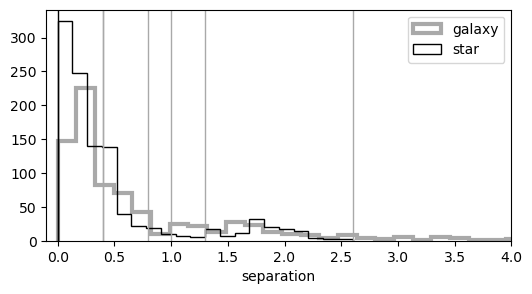

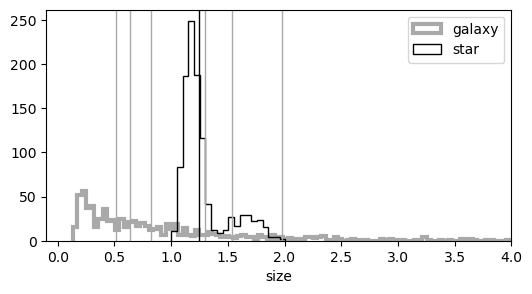

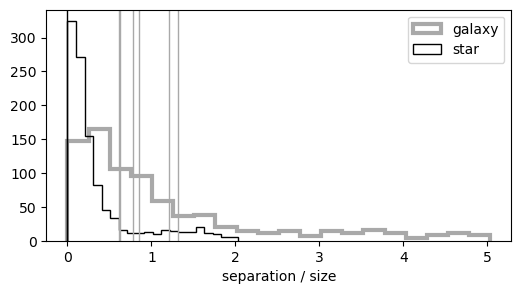

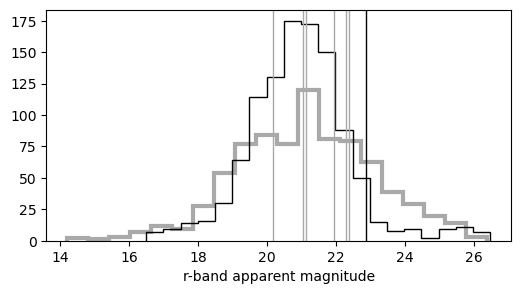

In [14]:
gx = np.where(lsdr10xm_flagstar == 0)[0]
sx = np.where(lsdr10xm_flagstar == 1)[0]
tx = np.where(lsdr10xm_mindex >= 0)[0]
bx = np.where(lsdr10xm_flagstar[tx] == 0)[0]
cx = np.where(lsdr10xm_flagstar[tx] == 1)[0]

plt.figure(figsize=(6, 3))
plt.hist(lsdr10xm_sep[gx], bins=400, histtype='step', color='darkgrey', lw=3, label='galaxy')
plt.hist(lsdr10xm_sep[sx], bins=20, histtype='step', color='black', lw=1, label='star')
for i in bx:
    plt.axvline(lsdr10xm_sep[tx[i]], color='darkgrey', lw=1)
for j in cx:
    plt.axvline(lsdr10xm_sep[tx[j]], color='black', lw=1)
plt.xlabel('separation')
plt.xlim([-0.1, 4])
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(6, 3))
plt.hist(lsdr10xm_shaper[gx], bins=400, histtype='step', color='darkgrey', lw=3, label='galaxy')
plt.hist(lsdr10xm_rpsfsize[sx], bins=20, histtype='step', color='black', lw=1, label='star')
for i in bx:
    plt.axvline(lsdr10xm_shaper[tx[i]], color='darkgrey', lw=1)
for j in cx:
    plt.axvline(lsdr10xm_rpsfsize[tx[j]], color='black', lw=1)
plt.xlabel('size')
plt.xlim([-0.1, 4])
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(6, 3))
plt.hist(lsdr10xm_sep[gx]/lsdr10xm_shaper[gx], bins=20, histtype='step', color='darkgrey', lw=3, label='galaxy')
plt.hist(lsdr10xm_sep[sx]/lsdr10xm_rpsfsize[sx], bins=20, histtype='step', color='black', lw=1, label='star')
for i in bx:
    plt.axvline(lsdr10xm_sep[tx[i]]/lsdr10xm_shaper[tx[i]], color='darkgrey', lw=1)
for j in cx:
    plt.axvline(lsdr10xm_sep[tx[j]]/lsdr10xm_rpsfsize[tx[j]], color='black', lw=1)
plt.xlabel('separation / size')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(6, 3))
plt.hist(lsdr10xm_rmag[gx], bins=20, histtype='step', color='darkgrey', lw=3, label='galaxy')
plt.hist(lsdr10xm_rmag[sx], bins=20, histtype='step', color='black', lw=1, label='star')
for i in bx:
    plt.axvline(lsdr10xm_rmag[tx[i]], color='darkgrey', lw=1)
for j in cx:
    plt.axvline(lsdr10xm_rmag[tx[j]], color='black', lw=1)
plt.xlabel('r-band apparent magnitude')
plt.show()

del tx, bx, cx

## DC22ikidc

What is it?

First, write out some stuff about the Tractor match.

In [15]:
for candid in ['DC22ikidc']:

    px = np.where(paramLC_candid == candid)[0]
    print(paramLC_field[px[0]])
    mr = paramLC_minmag_r[px[0]]
    
    tx = np.where(lsdr10xm_candid == candid)[0]
    pz = lsdr10xm_meanpz[tx[0]]
    stdpz = lsdr10xm_stdpz[tx[0]]
    rmag = lsdr10xm_rmag[tx[0]]
    gtype = lsdr10xm_type[tx[0]]
    shaper = lsdr10xm_shaper[tx[0]]
    rpsfsize = lsdr10xm_rpsfsize[tx[0]]
    ar = 0.0
    if pz > 0.0:
        dm = 5. * np.log10(cosmo.luminosity_distance(pz).value) + 25.
        ar = mr - dm
        dm1 = 5. * np.log10(cosmo.luminosity_distance(pz-stdpz).value) + 25.
        ar1 = mr - dm1
        dm2 = 5. * np.log10(cosmo.luminosity_distance(pz+stdpz).value) + 25.
        ar2 = mr - dm2
    else:
        shaper = rpsfsize
        pz = 0.0
        stdpz = 0.0
        ar = 0.0
    print('%10s & %5.2f & %3s & %4.2f & %5.2f & %4.2f$\\pm$%4.2f & %5.1f \\\\' % (candid, mr, gtype, shaper, rmag, pz, stdpz, ar))
    # print('%10s & %5.2f & %3s & %5.2f & %4.2f$\\pm$%4.2f & %5.1f \\\\' % (candid, mr, gtype, rmag, pz, stdpz, ar))
    print('separation: ', lsdr10xm_sep[tx[0]])
    print('abs mag range: ', ar1, ar2, (ar1-ar2)/2)

ELAIS
 DC22ikidc & 19.88 & REX & 0.56 & 21.35 & 0.22$\pm$0.10 & -20.3 \\
separation:  0.2
abs mag range:  -18.848987528442233 -21.182045750497945 1.166529111027856


Compare to TDEs.

iPTF16axa
https://ui.adsabs.harvard.edu/abs/2017ApJ...842...29H/abstract

ASASSN-14ae
https://ui.adsabs.harvard.edu/abs/2014MNRAS.445.3263H/abstract

AT2023clx
https://ui.adsabs.harvard.edu/abs/2024arXiv240111773C/abstract

In [16]:
fnm = 'data_TDE/iPTF16axa_TDE_Hung17.dat'
axa_mjd = np.loadtxt(fnm, dtype='float', usecols=(0))
axa_mag = np.loadtxt(fnm, dtype='float', usecols=(1))
axa_mage = np.loadtxt(fnm, dtype='float', usecols=(2))
axa_filt = np.loadtxt(fnm, dtype='str', usecols=(3))
del fnm
print('axa filters: ', np.unique(axa_filt))

fnm = 'data_TDE/ASASSN-14ae_TDE_Holoein14.dat'
a14ae_mjd = np.loadtxt(fnm, dtype='float', usecols=(0))
a14ae_filt = np.loadtxt(fnm, dtype='str', usecols=(1))
a14ae_mag = np.loadtxt(fnm, dtype='float', usecols=(2))
a14ae_mage = np.loadtxt(fnm, dtype='float', usecols=(3))
del fnm
print('a14ae filters: ', np.unique(a14ae_filt))

fnm = 'data_TDE/AT2023clx_TDE_Charalampopoulos.dat'
clx_mjd = np.loadtxt(fnm, dtype='float', usecols=(1))
clx_filt = np.loadtxt(fnm, dtype='str', usecols=(4))
clx_mag = np.loadtxt(fnm, dtype='float', usecols=(5))
clx_mage = np.loadtxt(fnm, dtype='float', usecols=(6))
del fnm
print('clx filters: ', np.unique(clx_filt))

axa filters:  ['g' 'gp' 'i' 'ip' 'r' 'rp']
a14ae filters:  ['g' 'i' 'r']
clx filters:  ['r']


In [17]:
fnm = '../all_nightly_epochs_files/nightly_epoch_magnitude_limits.dat'
neml_field = np.loadtxt(fnm, dtype='str', usecols=(0))
neml_caldate = np.loadtxt(fnm, dtype='str', usecols=(1))
neml_mjd = np.loadtxt(fnm, dtype='float', usecols=(2))
neml_filter = np.loadtxt(fnm, dtype='str', usecols=(3))
neml_nimgs = np.loadtxt(fnm, dtype='int', usecols=(4))
neml_limmag = np.loadtxt(fnm, dtype='float', usecols=(5))
neml_limmage = np.loadtxt(fnm, dtype='float', usecols=(6))
del fnm

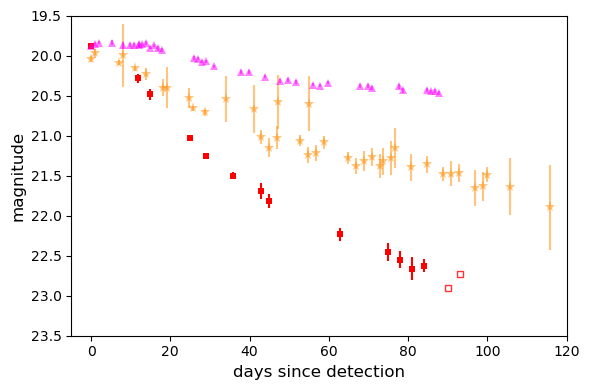

In [25]:
fig = plt.figure(figsize=(6, 4))

candid = 'DC22ikidc'
for f,filt in enumerate(all_filters):
    if f == 1:
        cx0 = np.where((candLC_candid == candid) & \
                       (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
        mindate = np.min(candLC_mjd[cx0])
        cx1 = np.where((candLC_candid == candid) & \
                       (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
        cx2 = np.where((candLC_candid == candid) & \
                       (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
        # plt.plot(candLC_mjd[cx0], candLC_mag[cx0], 
        #              all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label='DC22ikidc, '+filt)
        plt.errorbar(candLC_mjd[cx0]-mindate, candLC_mag[cx0], yerr=candLC_mage[cx0],
                     fmt=all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=1, color=all_fcolors[f], label='DC22ikidc, '+filt)
        plt.plot(candLC_mjd[cx1]-mindate, candLC_mag[cx1], 
                     all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
        plt.plot(candLC_mjd[cx2]-mindate, candLC_mag[cx2], 
                     all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])

### plot limits
# tx = np.where((neml_field == 'ELAIS') & (neml_filter == 'r'))[0]
# # tx = np.where(neml_field == 'ELAIS')[0]
# epochs = neml_mjd[tx] - mindate
# lims = neml_limmag[tx]
# del tx
# plt.plot(epochs, lims, 'v', ms=2, color='grey')
# del epochs, lims

tx = np.where((axa_filt == 'r') | (axa_filt == 'rp'))[0]
temp = np.min(axa_mjd[tx])
plt.errorbar(axa_mjd[tx] - temp, axa_mag[tx], yerr=axa_mage[tx], fmt='*', ms=8, alpha=0.5, color='darkorange', mew=0, label='iPTF16axa, r')
del tx, temp

tx = np.where(a14ae_filt == 'r')[0]
temp = np.min(a14ae_mjd[tx])
plt.errorbar(a14ae_mjd[tx] - temp, a14ae_mag[tx] + 3.5, yerr=a14ae_mage[tx], fmt='^', alpha=0.5, color='magenta', mew=0, label='ASASSN-14ae, r+3.5')
del tx, temp

# temp = np.min(clx_mjd)
# plt.errorbar(clx_mjd - temp, clx_mag + 4.0, yerr=clx_mage, fmt='v', alpha=0.5, color='black', mew=0, label='AT2023clx, r+4.0')
# del temp

# plt.xlim([59955, 60100])
plt.xlim([-5, 120])
plt.ylim([23.5, 19.5])
# plt.title(candid)
# plt.legend(loc='lower left', labelspacing=0.2, handletextpad=0.1, fontsize=12)
plt.xlabel('days since detection', fontsize=12)
plt.ylabel('magnitude', fontsize=12)
plt.tight_layout()
plt.savefig('plots/DC22ikidc')
plt.show()